In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [3]:
#ucitavanje skupa
df = pd.read_csv("C:/Users/student/Desktop/ipVezbe122021/primeri/dogs.csv")

#prikaz imena kolona + 5 prvih instanci
print('Prvih 5 instanci')
print(df.head())


Prvih 5 instanci
              breed  height  weight
0     Border Collie      19      45
1    Boston Terrier      12      20
2  Brittany Spaniel      18      35
3       Bullmastiff      29     120
4         Chihuahua       8       8


In [4]:
# Za klasterovanje ce se koristiti atributi visina i tezina psa,
# a rasa nece biti uzeta u obzir.
features = df.columns[1:].tolist()

#normalizacija atributa posto se koristi euklidsko rastojanje
x=pd.DataFrame(MinMaxScaler().fit_transform(df[features]), columns = features)




    AgglomerativeClustering
    
    parametri:
    n_clusters : broj klastera
                 default=2
    affinity : mera za racnunanje bliskosti
              default: “euclidean”
              Moze biti npr. “euclidean”, “l1”, “l2”, “manhattan”, “cosine”
    linkage : veza
              Moze biti “single”, “complete”, “average”
    
    atributi:
    labels_ : oznake klastera za svaku instancu. Klasteri imaju oznake 0, 1, ..., k-1
    n_leaves_ : broj listova u hijerahijskom drvetu
    children_ : deca cvorova koji nisu listovi. Vrednosti manje od broja instanci u skupu predstavljaju indekse instanci.
   

In [5]:
# Definisanje boja koje se koriste pri crtanju instanci klastera.
# Instance jednog klastera ce biti prikazane istom bojom.
colors = ['red', 'green', 'gold']

<Figure size 432x288 with 0 Axes>

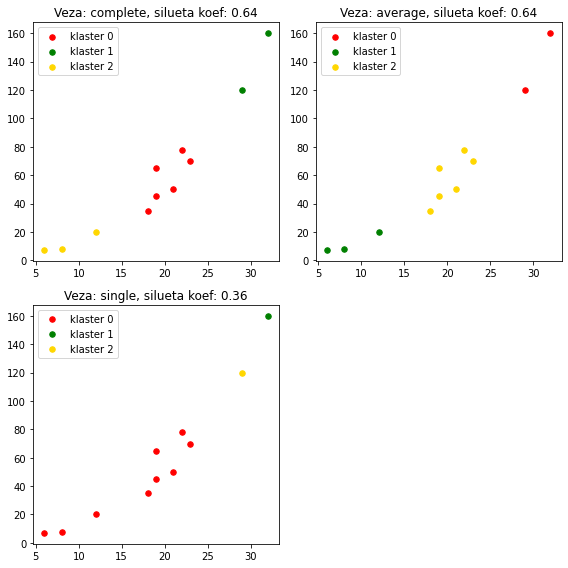

In [19]:
# pravljenje slike sa graficima
fig = plt.figure(figsize=(8,8))

#oznaka celije na slici u kojoj se vrse naredna crtanja
plt_ind=1

# primena razlicitih veza pri odredjivanju bliskosti dva klastera
for link in ['complete', 'average', 'single']:

    #primena hijerarhijskog sakupljajuceg klasterovanja
    #i izdvajanje 3 klastera
    est=AgglomerativeClustering(n_clusters=3, linkage=link)
    est.fit(x)

    # Originalnom skupu se dodaje jos jedan atribut 'label', koji sadrzi
    # podatak kom klasteru pripada koja instanca.
    # Oznake klastera su u intervalu [0, n_clusters-1]
    df['label']= est.labels_

    # Podela slike na 2x2 celije i zadavanje
    # celije (plt_ind) u kojoj ce se izvrsiti naredna crtanja.
    fig.add_subplot(2, 2, plt_ind)

    # Svakom klasteru (oznake klastera su u intervalu [0, 2]) se dodeljuje jedinstvena
    # boja. Instance jednog klastera se crtaju pomocu seme sa rasprsenim elementima i
    # boje se bojom koja je dodeljena njihovom klasteru. Na x osi je visina psa iz originalnog
    # skupa, a na y osi tezina psa. Instance su predstavljene kao tacke.
    for j in range(0,3):

        # izdvajanje instanci klastera koji se obradjuje
        cluster= df.loc[df['label'] == j, :]

        # crtanje instanci klastera pomocu seme sa rasprsenim elementima
        plt.scatter(cluster['height'], cluster['weight'], color=colors[j], s=30, marker='o', label="klaster {0}".format(j))

    # postavljanje legende i naslova (koji sadrzi primenjenu vezu pri klasterovanju i silueta koeficijent)
    # za svaku celiju
    plt.legend()
    plt.title('Veza: {0}, silueta koef: {1:0.2}'.format(link, silhouette_score(x, df['label'])))

    # Prelazak u narednu celiju u kojoj ce se prikazati
    # rezultat klasterovanja sa novim parametrima.
    plt_ind += 1

# prikaz slike bez poklapanja celija
plt.tight_layout()
plt.show()



In [20]:
# Koriscenjem 'complete' i 'average' veze pri klasterovanju dobijaju se isti klasteri.
# Klasterovanjem su psi podeljeni na grupe malog, srednjeg i velikog rasta.

# Primenom 'single' veze dobijeni su drugaciji klasteri. Psi malog i srednjeg rasta su
# u jednom klasteru, dok su psi velikog rasta podeljeni u dva klastera.
